In [6]:
from sklearn.datasets import fetch_mldata

In [7]:
mnist=fetch_mldata('MNIST original')

In [9]:
X,y=mnist['data'],mnist['target']

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

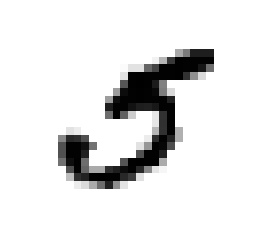

In [18]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [19]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [20]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


In [21]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [26]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [31]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [36]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3, random_state=42)

# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = (y_train_5[train_index])
#     X_test_fold = X_train[test_index]
#     y_test_fold = (y_train_5[test_index])

#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))

0.9656
0.94485
0.94985


In [54]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ..., False, False, False], dtype=bool)

In [48]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
confusion_matrix(y_train_5,y_train_pred)

array([[52637,  1942],
       [  852,  4569]])

In [51]:
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.701735524497
0.842833425567


In [52]:
f1_score(y_train_5,y_train_pred)

0.7658397586322494

In [58]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [59]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

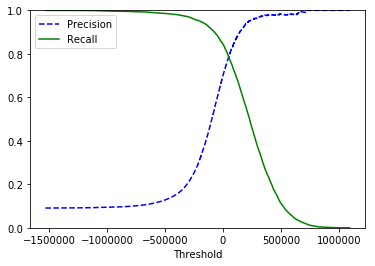

In [84]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")    
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")    
    plt.xlabel("Threshold")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [85]:
y_train_pred_90 = (y_scores > 70000)

In [86]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

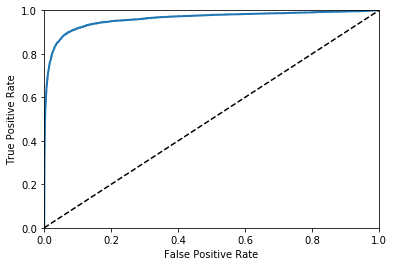

In [87]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [88]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.96107868112319195

In [89]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")

In [93]:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

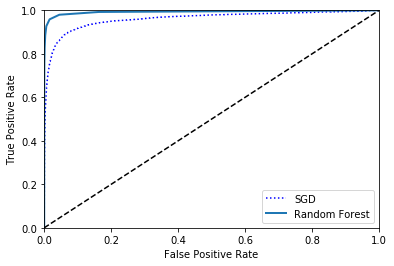

In [96]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [97]:
 roc_auc_score(y_train_5, y_scores_forest)

0.99292292738582244

In [ ]:
y_forest_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
recall_score(y_train_5,y_forest_pred)

In [112]:
sgd_clf.fit(X_train, y_train)  # y_train, not y_train_5
sgd_clf.predict([some_digit])

array([ 5.])

In [113]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [114]:
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0. ,  0.1,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ]])

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.90806839,  0.91039552,  0.91123669])

In [128]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5730,    4,   19,   10,   10,   54,   40,   11,   41,    4],
       [   1, 6484,   45,   27,    6,   39,    7,   10,  112,   11],
       [  52,   36, 5317,  109,   80,   22,   91,   61,  176,   14],
       [  45,   33,  135, 5350,    4,  226,   32,   62,  149,   95],
       [  20,   27,   35,    9, 5359,   11,   57,   28,   76,  220],
       [  64,   45,   32,  189,   60, 4607,  111,   32,  184,   97],
       [  31,   24,   58,    2,   42,   88, 5624,    4,   44,    1],
       [  26,   22,   62,   28,   49,   12,    7, 5789,   16,  254],
       [  48,  165,   63,  147,   14,  153,   58,   30, 5036,  137],
       [  42,   34,   26,   85,  156,   33,    2,  201,   72, 5298]])

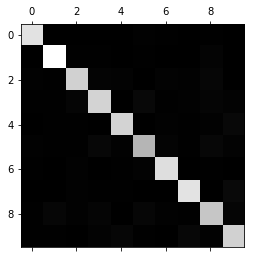

In [129]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [130]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

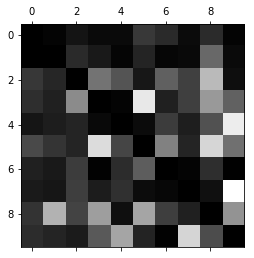

In [131]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [134]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [143]:
knn_clf.predict([X[20000]])

array([[False,  True]], dtype=bool)

In [163]:
import random as rnd
noise_1 = np.random.randint(0, 100,size=(60000, 784))
noise_2 = np.random.randint(0, 100, (10000, 784))
X_train_mod = X_train + noise_1
X_test_mod = X_test + noise_2
y_train_mod = X_train
y_test_mod = X_test

In [183]:
def plot_digit(x_letter):
    plt.imshow(x_letter.reshape(28,28), cmap = matplotlib.cm.binary,interpolation="nearest")
    plt.axis("off")
    plt.show()

In [184]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[1000]])


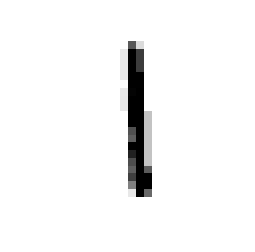

In [185]:
plot_digit(clean_digit)